In [3]:
# Author: Aayush Patel - CS20BTECH11001
# Final output is written in output.txt
# Plots will be printed upon execution

In [4]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import math

In [5]:
N = 1000
x = [float(k/N) for k in range(-N, N+1, 1)]
def approximate(n, least_squares=True):
    global N
    a = cp.Variable(shape=(n,1))
    X = np.zeros((n+1, len(x))) # 2 dimensionals
    for k in range(0, n+1, 1):
        X[k] = np.power(x, k) # X is 2-dim so X[k] is 1 dim. Cant do reshape here to 2 dim coz, X[k] is 1 dim set. so it can contain 1d arrays only
    constraints = []
    if least_squares:
        objective = cp.Minimize(cp.sum(cp.square(X[n].reshape(2*N+1,1) - X[0:n].T@a))) # Look at the docs of @
    else:
        objective = cp.Minimize(cp.sum(cp.abs(X[n].reshape(2*N+1,1) - X[0:n].T@a)))
    optimal_cost = cp.Problem(objective, constraints).solve()
    
    return a, optimal_cost

In [6]:
output = {
    'L1': {'costs':[], 'coeff':[]},
    'L2': {'costs':[], 'coeff':[]}
}

In [7]:
for n in [5, 10, 20]:
    var, optimal_cost = approximate(n, least_squares=False)
    output['L1']['coeff'].append(var.value.reshape(n,))
    output['L1']['costs'].append(optimal_cost)
    var, optimal_cost = approximate(n)
    output['L2']['coeff'].append(var.value.reshape(n,))
    output['L2']['costs'].append(optimal_cost)

In [8]:
# Takes time depending upon N
y_L1_costs = [t for t in [approximate(n, least_squares=False)[1] for n in range(1,15)]]
y_L2_costs = [t for t in [approximate(n)[1] for n in range(1,15)]]

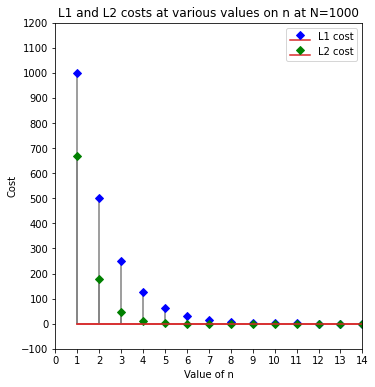

In [9]:
plt.rcParams["figure.figsize"] = [5.50, 6]
markerline, stemlines, baseline = plt.stem(range(1,15), y_L1_costs, linefmt ='grey', markerfmt ='bD',
    bottom = 0, use_line_collection = True, label='L1 cost')
markerline, stemlines, baseline = plt.stem(range(1,15), y_L2_costs, linefmt ='grey', markerfmt ='gD',
    bottom = 0, use_line_collection = True, label='L2 cost')
# markerline.set_markerfacecolor('none')
plt.margins(x=0, y=0)
plt.xticks(range(0,15))
plt.xlabel('Value of n')
plt.ylabel('Cost')
max_cost = y_L1_costs[0]
step = math.floor(max_cost/10)
plt.yticks(range(-step, math.ceil(max_cost*1.2), step))
plt.legend()
plt.title(f'L1 and L2 costs at various values on n at N={N}')
plt.show()

In [10]:
def calculate(point, n, coefficients):
    op = 0
    for i in range(0, n):
        op += pow(point, i) * coefficients[i]
    return op

def plotter(n, cost_func):
    plt.plot(x, [pow(point, n) for point in x], label=f'Actual')
    plt.plot(x, [calculate(point, n, output[cost_func]["coeff"][n//10]) for point in x], label=f'Approximate')
    plt.title(f'For n = {n} using {cost_func} cost function')
    plt.legend()
    plt.show()

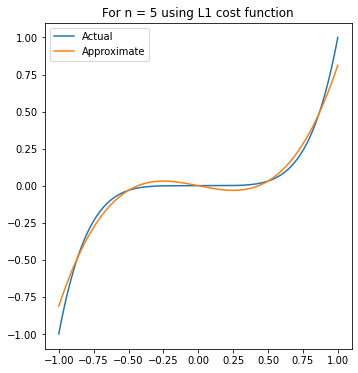

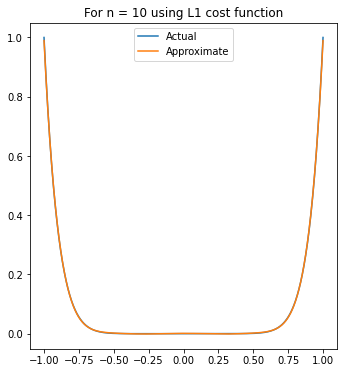

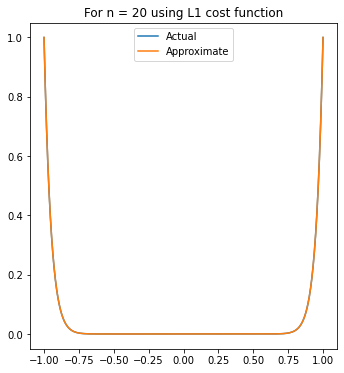

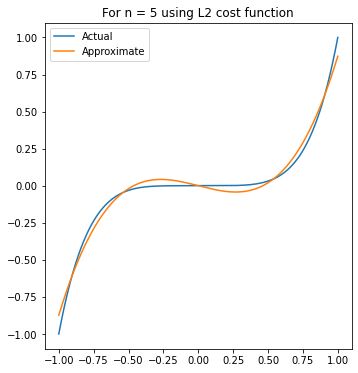

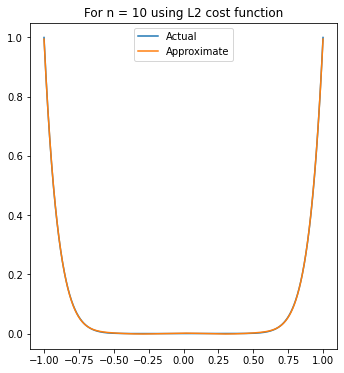

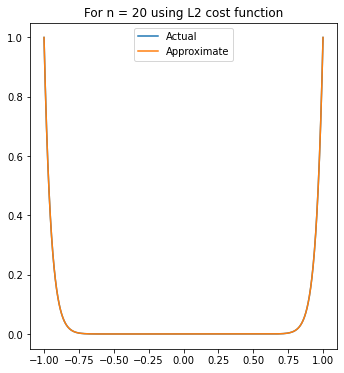

In [11]:
for cost_func in ["L1", "L2"]:
    for n in [5, 10, 20]:
        plotter(n, cost_func)

In [12]:
def write_to_file(cost_func, f):
    f.write(f'For {cost_func} cost function at N={N}:\n')
    for i in [1,2,3]:
        f.write(f'\tCoefficents at n = {5*int(pow(2,i-1))}: ')
        np.savetxt(f, output[cost_func]['coeff'][i-1], fmt='%.2f', newline=', ')
        f.write('\n')
        c = output[cost_func]['costs'][i-1]
        f.write(f'\tCost at n = {5*int(pow(2,i-1))}: {c}\n\n')

with open("output.txt", 'w') as f:
    write_to_file('L1', f)
    f.write('\n')
    write_to_file('L2', f)